In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
safedriverData = pd.read_csv(r"D:\Nikhil's Stuff\internship\project\archive\IT_3.csv", header=0)

# Copy to back-up file

safedriver_bk = safedriverData.copy()

# Display first 5 values

safedriverData.head()

,ID,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,Age_bucket,EngineHP_bucket,Years_Experience_bucket,Miles_driven_annually_bucket,credit_history_bucket,State
0,1,1,F,522,656,1,0,Married,Car,14749.0,5,<18,>350,<3,<15k,Fair,IL
1,2,1,F,691,704,16,0,Married,Car,15389.0,6,28-34,>350,15-30,15k-25k,Good,NJ
2,3,1,M,133,691,15,0,Married,Van,9956.0,3,>40,90-160,15-30,<15k,Good,CT
3,4,1,M,146,720,9,0,Married,Van,77323.0,3,18-27,90-160,9-14',>25k,Good,CT
4,5,1,M,128,771,33,1,Married,Van,14183.0,4,>40,90-160,>30,<15k,Very Good,WY


In [3]:
safedriverData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30240 entries, 0 to 30239
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            30240 non-null  int64  
 1   target                        30240 non-null  int64  
 2   Gender                        30240 non-null  object 
 3   EngineHP                      30240 non-null  int64  
 4   credit_history                30240 non-null  int64  
 5   Years_Experience              30240 non-null  int64  
 6   annual_claims                 30240 non-null  int64  
 7   Marital_Status                30240 non-null  object 
 8   Vehical_type                  30240 non-null  object 
 9   Miles_driven_annually         30232 non-null  float64
 10  size_of_family                30240 non-null  int64  
 11  Age_bucket                    30240 non-null  object 
 12  EngineHP_bucket               30240 non-null  object 
 13  Y

In [4]:
safedriverData.describe()

,ID,target,EngineHP,credit_history,Years_Experience,annual_claims,Miles_driven_annually,size_of_family
count,30240.000000,30240.00000,30240.000000,30240.000000,30240.000000,30240.000000,30232.000000,30240.000000
mean,15120.500000,0.70754,196.604266,685.769775,13.255721,1.138459,17422.938939,4.521296
std,8729.680407,0.45490,132.346961,102.454307,9.890246,1.082913,17483.782840,2.286531
min,1.000000,0.00000,80.000000,300.000000,1.000000,0.000000,5000.000000,1.000000
25%,7560.750000,0.00000,111.000000,668.000000,5.000000,0.000000,9668.500000,3.000000
50%,15120.500000,1.00000,141.000000,705.000000,10.000000,1.000000,12280.000000,5.000000
75%,22680.250000,1.00000,238.000000,753.000000,20.000000,2.000000,14697.250000,7.000000
max,30240.000000,1.00000,1005.000000,850.000000,40.000000,4.000000,99943.000000,8.000000


In [5]:
safedriverData.isnull().sum()

ID                              0
target                          0
Gender                          0
EngineHP                        0
credit_history                  0
Years_Experience                0
annual_claims                   0
Marital_Status                  0
Vehical_type                    0
Miles_driven_annually           8
size_of_family                  0
Age_bucket                      0
EngineHP_bucket                 0
Years_Experience_bucket         0
Miles_driven_annually_bucket    8
credit_history_bucket           0
State                           0
dtype: int64

In [6]:
safedriverData.duplicated().any()

False

In [7]:
# Display the 'purpose' variable by sub-variable count

safedriverData['Gender'].value_counts()

M    16359
F    13881
Name: Gender, dtype: int64

In [8]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

safedriverData['Gender'] = LE.fit_transform(safedriverData[['Gender']])

In [9]:
# Display the 'Marital_Status' variable by sub-variable count

safedriverData['Marital_Status'].value_counts()

Married    19820
Single     10420
Name: Marital_Status, dtype: int64

In [10]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

safedriverData['Marital_Status'] = LE.fit_transform(safedriverData[['Marital_Status']])

In [11]:
# Display the 'Marital_Status' variable by sub-variable count

safedriverData['Vehical_type'].value_counts()

Car        11582
Truck       8798
Van         5853
Utility     4007
Name: Vehical_type, dtype: int64

In [12]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

safedriverData['Vehical_type'] = LE.fit_transform(safedriverData[['Vehical_type']])

In [13]:
# Display the 'Marital_Status' variable by sub-variable count

safedriverData['Age_bucket'].value_counts()

>40      12630
18-27     8097
35-40     6546
28-34     2056
<18        911
Name: Age_bucket, dtype: int64

In [14]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

safedriverData['Age_bucket'] = LE.fit_transform(safedriverData[['Age_bucket']])

In [15]:
# Display the 'Marital_Status' variable by sub-variable count

safedriverData['State'].value_counts()

NJ    4884
CT    4444
OR    3838
NY    3686
VT    1429
WV    1253
WY     288
MA     284
CO     272
WI     271
LA     264
DE     261
OK     260
PA     257
AR     255
VA     252
CA     251
FL     251
ID     251
SC     249
KY     248
ME     248
MD     247
AL     246
ND     245
UT     244
IA     242
TN     242
RI     242
GA     242
MN     242
KS     241
IN     241
NV     239
MT     238
MO     237
NM     236
MI     235
WA     233
TX     233
SD     229
NH     229
AZ     225
HI     225
OH     223
NE     222
NC     221
MS     220
IL     220
AK     205
Name: State, dtype: int64

In [16]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

safedriverData['State'] = LE.fit_transform(safedriverData[['State']])

In [17]:
safedriverData = safedriverData.drop(['EngineHP_bucket','Miles_driven_annually_bucket','Years_Experience_bucket','credit_history_bucket'],axis=1)

In [18]:
from sklearn.impute import KNNImputer

imputer_knn = KNNImputer(missing_values=np.nan)

# Fill the missing values for 'Driver_Age'

safedriverData['Miles_driven_annually'] = imputer_knn.fit_transform(safedriverData[['Miles_driven_annually']])
#safedriver_bk['Miles_driven_annually_bucket'] = imputer_knn.fit_transform(safedriver_bk[['Miles_driven_annually_bucket']])
safedriverData['Miles_driven_annually'] = safedriverData['Miles_driven_annually'].astype(int)
#afedriver_bk['Miles_driven_annually_bucket'] = safedriver_bk['Miles_driven_annually_bucket'].astype(int)

In [19]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in safedriverData.columns:
    if col != 'target':
        IndepVar.append(col)

TargetVar = 'target'

x = safedriverData[IndepVar]
y = safedriverData[TargetVar]

In [20]:
safedriverData.isnull().sum()

ID                       0
target                   0
Gender                   0
EngineHP                 0
credit_history           0
Years_Experience         0
annual_claims            0
Marital_Status           0
Vehical_type             0
Miles_driven_annually    0
size_of_family           0
Age_bucket               0
State                    0
dtype: int64

In [21]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

# Display the shape of train and test data 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((21168, 12), (9072, 12), (21168,), (9072,))

In [22]:
# Display all the variable in the loan dataset

safedriverData.columns

Index(['ID', 'target', 'Gender', 'EngineHP', 'credit_history',
       'Years_Experience', 'annual_claims', 'Marital_Status', 'Vehical_type',
       'Miles_driven_annually', 'size_of_family', 'Age_bucket', 'State'],
      dtype='object')

In [23]:
# Identify variable which are suppose to normilize the values

mm_cols = ['ID','Gender', 'EngineHP', 'credit_history',
       'Years_Experience', 'annual_claims', 'Marital_Status', 'Vehical_type',
       'Miles_driven_annually', 'size_of_family', 'Age_bucket', 'State']

In [24]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[mm_cols] = mmscaler.fit_transform(x_train[mm_cols])
#x_train = mmscaler.fit_transform(x_train)
x_train[mm_cols] = pd.DataFrame(x_train[mm_cols])

x_test[mm_cols] = mmscaler.fit_transform(x_test[mm_cols])
#x_test = mmscaler.fit_transform(x_test)
x_test[mm_cols] = pd.DataFrame(x_test[mm_cols])

Confusion matrix : 
 [[6342  100]
 [2597   33]]
Outcome values : 
 6342 100 2597 33
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.98      0.82      6442
           0       0.25      0.01      0.02      2630

    accuracy                           0.70      9072
   macro avg       0.48      0.50      0.42      9072
weighted avg       0.58      0.70      0.59      9072

Accuracy : 70.3 %
Precision : 70.9 %
Recall : 98.4 %
F1 Score : 0.825
Specificity or True Negative Rate : 1.3 %
Balanced Accuracy : 49.8 %
MCC : -0.011
roc_auc_score: 0.499


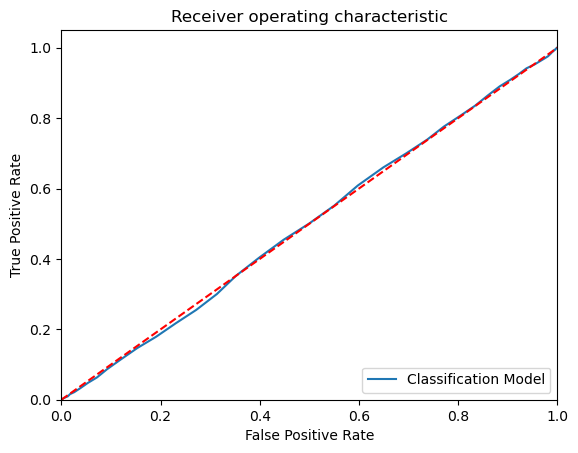

-----------------------------------------------------------------------------------------------------


In [25]:
# To build the 'safedriverprediction' model with random sampling

from sklearn.ensemble import RandomForestClassifier

# Create model object

ModelRF = RandomForestClassifier()
#ModelRF = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2,
#                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
#                                 max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
#                                 n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
#                                 ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelRF.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelRF.predict(x_test)
y_pred_prob = ModelRF.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF.predict_proba(x_test)[:,1])
plt.figure()
#--------------------------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [26]:
# Results

PredResults = pd.DataFrame({'target_A':y_test, 'target_P':y_pred})

# Merge two Dataframes on index of both the dataframes

TestDataResults = safedriver_bk.merge(PredResults, left_index=True, right_index=True)

# Display the 10 records randomly

TestDataResults.sample(5)

,ID,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,Age_bucket,EngineHP_bucket,Years_Experience_bucket,Miles_driven_annually_bucket,credit_history_bucket,State,target_A,target_P
23272,23273,1,M,145,722,29,0,Married,Van,7825.0,1,>40,90-160,15-30,<15k,Good,OK,1,1
6395,6396,0,M,97,792,3,0,Married,Truck,7672.0,3,18-27,90-160,3-8',<15k,Very Good,RI,0,1
6758,6759,1,F,110,754,5,0,Married,Truck,5345.0,3,18-27,90-160,3-8',<15k,Very Good,NY,1,1
10899,10900,1,M,86,743,27,1,Single,Utility,14131.0,3,>40,<90,15-30,<15k,Very Good,DE,1,1
4106,4107,1,F,182,696,7,3,Single,Van,13132.0,2,35-40,161-350,3-8',>25k,Good,OR,1,1


In [27]:
# Load the results dataset

EMResults = pd.read_csv(r"D:\Nikhil's Stuff\internship\sql docs\EMResults.csv", header=0)

# Display the first 5 records

EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


In [31]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


Model Name:  LogisticRegression()
Confusion matrix : 
 [[6442    0]
 [2630    0]]
Outcome values : 
 6442 0 2630 0
Classification report : 
               precision    recall  f1-score   support

           1       0.71      1.00      0.83      6442
           0       0.00      0.00      0.00      2630

    accuracy                           0.71      9072
   macro avg       0.36      0.50      0.42      9072
weighted avg       0.50      0.71      0.59      9072

Accuracy : 71.0 %
Precision : 71.0 %
Recall : 100.0 %
F1 Score : 0.83
Specificity or True Negative Rate : 0.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


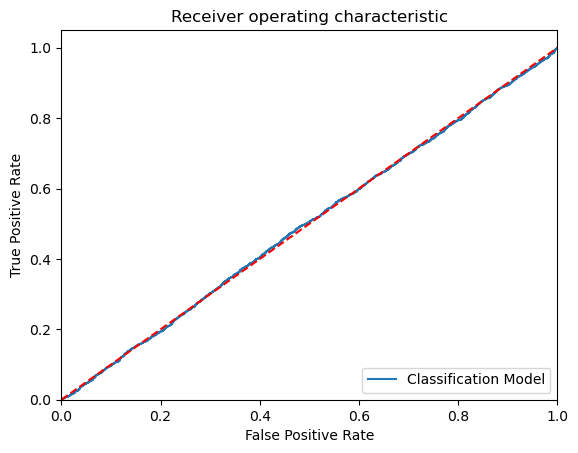

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[4423 2019]
 [1837  793]]
Outcome values : 
 4423 2019 1837 793
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.69      0.70      6442
           0       0.28      0.30      0.29      2630

    accuracy                           0.57      9072
   macro avg       0.49      0.49      0.49      9072
weighted avg       0.58      0.57      0.58      9072

Accuracy : 57.5 %
Precision : 70.7 %
Recall : 68.7 %
F1 Score : 0.696
Specificity or True Negative Rate : 30.2 %
Balanced Accuracy : 49.5 %
MCC : -0.012
roc_auc_score: 0.494


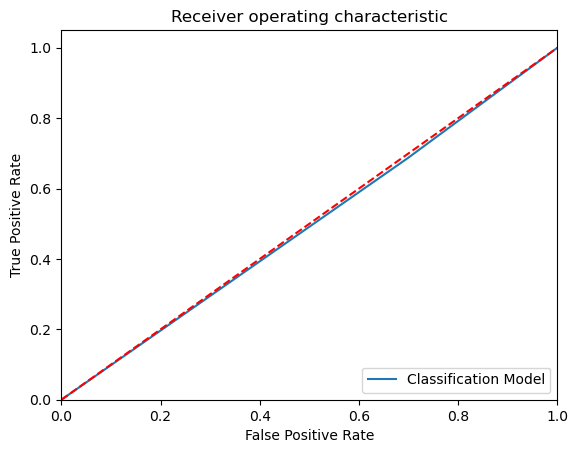

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[6348   94]
 [2591   39]]
Outcome values : 
 6348 94 2591 39
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.99      0.83      6442
           0       0.29      0.01      0.03      2630

    accuracy                           0.70      9072
   macro avg       0.50      0.50      0.43      9072
weighted avg       0.59      0.70      0.59      9072

Accuracy : 70.4 %
Precision : 71.0 %
Recall : 98.5 %
F1 Score : 0.825
Specificity or True Negative Rate : 1.5 %
Balanced Accuracy : 50.0 %
MCC : 0.001
roc_auc_score: 0.5


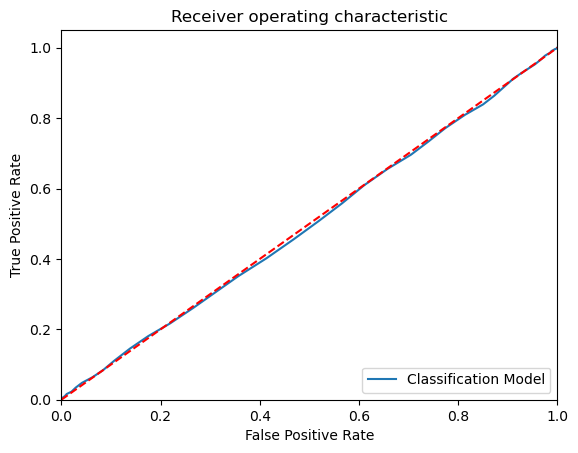

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[6206  236]
 [2541   89]]
Outcome values : 
 6206 236 2541 89
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.96      0.82      6442
           0       0.27      0.03      0.06      2630

    accuracy                           0.69      9072
   macro avg       0.49      0.50      0.44      9072
weighted avg       0.58      0.69      0.60      9072

Accuracy : 69.4 %
Precision : 71.0 %
Recall : 96.3 %
F1 Score : 0.817
Specificity or True Negative Rate : 3.4 %
Balanced Accuracy : 49.8 %
MCC : -0.007
roc_auc_score: 0.499


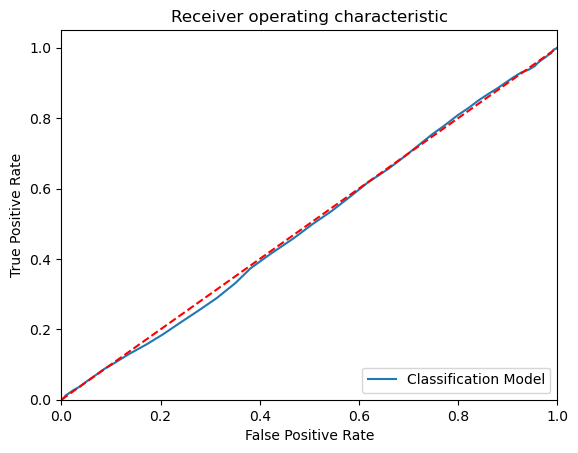

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[5512  930]
 [2220  410]]
Outcome values : 
 5512 930 2220 410
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.86      0.78      6442
           0       0.31      0.16      0.21      2630

    accuracy                           0.65      9072
   macro avg       0.51      0.51      0.49      9072
weighted avg       0.59      0.65      0.61      9072

Accuracy : 65.3 %
Precision : 71.3 %
Recall : 85.6 %
F1 Score : 0.778
Specificity or True Negative Rate : 15.6 %
Balanced Accuracy : 50.6 %
MCC : 0.015
roc_auc_score: 0.506


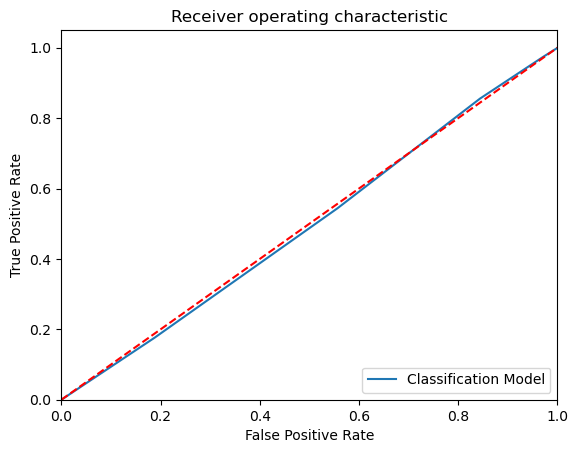

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[6442    0]
 [2630    0]]
Outcome values : 
 6442 0 2630 0
Classification report : 
               precision    recall  f1-score   support

           1       0.71      1.00      0.83      6442
           0       0.00      0.00      0.00      2630

    accuracy                           0.71      9072
   macro avg       0.36      0.50      0.42      9072
weighted avg       0.50      0.71      0.59      9072

Accuracy : 71.0 %
Precision : 71.0 %
Recall : 100.0 %
F1 Score : 0.83
Specificity or True Negative Rate : 0.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


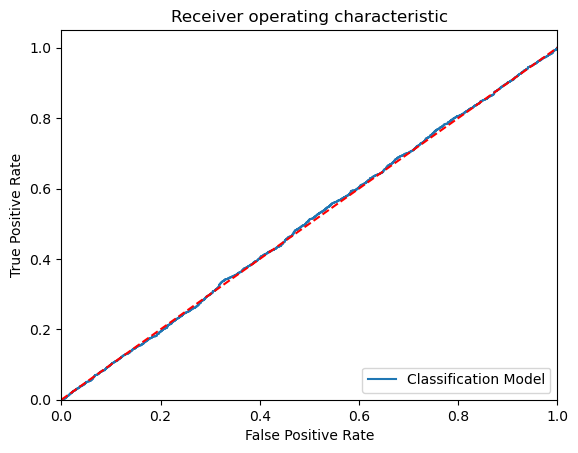

-----------------------------------------------------------------------------------------------------
Model Name:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)
Confusion matrix : 
 [[6405   37]
 [2609   21]]
Outcome values : 
 6405 37 2609 21
Classification report : 
               precisi

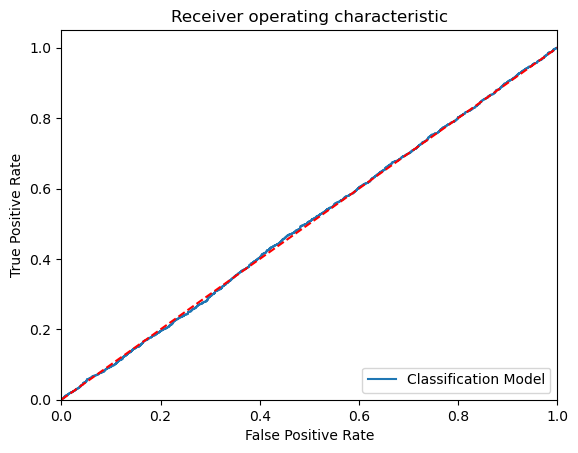

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[6412   30]
 [2614   16]]
Outcome values : 
 6412 30 2614 16
Classification report : 
               precision    recall  f1-score   support

           1       0.71      1.00      0.83      6442
           0       0.35      0.01      0.01      2630

    accuracy                           0.71      9072
   macro avg       0.53      0.50      0.42      9072
weighted avg       0.61      0.71      0.59      9072

Accuracy : 70.9 %
Precision : 71.0 %
Recall : 99.5 %
F1 Score : 0.829
Specificity or True Negative Rate : 0.6 %
Balanced Accuracy : 50.0 %
MCC : 0.009
roc_auc_score: 0.501


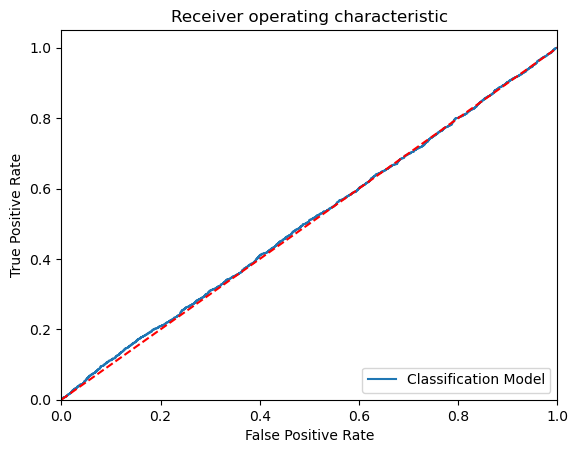

-----------------------------------------------------------------------------------------------------


In [34]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import lightgbm as lgb
import matplotlib.pyplot as plt 

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelGNB = GaussianNB()
ModelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')
ModelLGB = lgb.LGBMClassifier()

# Evaluation matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelXGB, ModelLGB]

# Rest of your code...

#MM = [ModelLR, ModelDC, ModelRF, ModelET]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #---
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #---

In [35]:
# Results with comparing the all the algorithms 

#EMResults.to_csv("D:\Nikhil's Stuff\internship\project\archive\IT_3.csv")

EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),6442,0,2630,0,0.710,0.710,1.000,0.830,0.000,NaN,0.500000,0.500
1,DecisionTreeClassifier(),4423,2019,1837,793,0.575,0.707,0.687,0.696,0.302,-0.012,0.494054,0.495
2,"(DecisionTreeClassifier(max_features='sqrt', r...",6348,94,2591,39,0.704,0.710,0.985,0.825,0.015,0.001,0.500119,0.500
3,"(ExtraTreeClassifier(random_state=1344022104),...",6206,236,2541,89,0.694,0.710,0.963,0.817,0.034,-0.007,0.498603,0.498
4,KNeighborsClassifier(),5512,930,2220,410,0.653,0.713,0.856,0.778,0.156,0.015,0.505764,0.506


In [40]:
safedriverData.isnull().sum()

ID                       0
target                   0
Gender                   0
EngineHP                 0
credit_history           0
Years_Experience         0
annual_claims            0
Marital_Status           0
Vehical_type             0
Miles_driven_annually    0
size_of_family           0
Age_bucket               0
State                    0
dtype: int64

In [41]:
safedriverData.duplicated().any()

False

In [42]:
# Display the 'purpose' variable by sub-variable count

safedriverData['Gender'].value_counts()

1    16359
0    13881
Name: Gender, dtype: int64

In [43]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

safedriverData['Gender'] = LE.fit_transform(safedriverData[['Gender']])

In [44]:
# Display the 'Marital_Status' variable by sub-variable count

safedriverData['Marital_Status'].value_counts()

0    19820
1    10420
Name: Marital_Status, dtype: int64

In [45]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

safedriverData['Marital_Status'] = LE.fit_transform(safedriverData[['Marital_Status']])

In [46]:
# Display the 'Marital_Status' variable by sub-variable count

safedriverData['Vehical_type'].value_counts()

0    11582
1     8798
3     5853
2     4007
Name: Vehical_type, dtype: int64

In [47]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

safedriverData['Vehical_type'] = LE.fit_transform(safedriverData[['Vehical_type']])

In [48]:
# Display the 'Marital_Status' variable by sub-variable count

safedriverData['Age_bucket'].value_counts()

4    12630
0     8097
2     6546
1     2056
3      911
Name: Age_bucket, dtype: int64

In [49]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

safedriverData['Age_bucket'] = LE.fit_transform(safedriverData[['Age_bucket']])

In [50]:
# Display the 'Marital_Status' variable by sub-variable count

safedriverData['State'].value_counts()

30    4884
6     4444
36    3838
33    3686
45    1429
48    1253
49     288
18     284
5      272
47     271
17     264
7      261
35     260
37     257
2      255
44     252
4      251
8      251
12     251
39     249
16     248
20     248
19     247
1      246
27     245
43     244
11     242
41     242
38     242
9      242
22     242
15     241
14     241
32     239
25     238
23     237
31     236
21     235
46     233
42     233
40     229
29     229
3      225
10     225
34     223
28     222
26     221
24     220
13     220
0      205
Name: State, dtype: int64

In [51]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

safedriverData['State'] = LE.fit_transform(safedriverData[['State']])

In [52]:
from sklearn.impute import KNNImputer

imputer_knn = KNNImputer(missing_values=np.nan)

# Fill the missing values for 'Driver_Age'

safedriverData['Miles_driven_annually'] = imputer_knn.fit_transform(safedriverData[['Miles_driven_annually']])
#safedriver_bk['Miles_driven_annually_bucket'] = imputer_knn.fit_transform(safedriver_bk[['Miles_driven_annually_bucket']])
safedriverData['Miles_driven_annually'] = safedriverData['Miles_driven_annually'].astype(int)
#afedriver_bk['Miles_driven_annually_bucket'] = safedriver_bk['Miles_driven_annually_bucket'].astype(int)

In [53]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in safedriverData.columns:
    if col != 'target':
        IndepVar.append(col)

TargetVar = 'target'

x = safedriverData[IndepVar]
y = safedriverData[TargetVar]

In [54]:
safedriverData.isnull().sum()

ID                       0
target                   0
Gender                   0
EngineHP                 0
credit_history           0
Years_Experience         0
annual_claims            0
Marital_Status           0
Vehical_type             0
Miles_driven_annually    0
size_of_family           0
Age_bucket               0
State                    0
dtype: int64

In [55]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

# Display the shape of train and test data 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((21168, 12), (9072, 12), (21168,), (9072,))

In [56]:
# Display all the variable in the loan dataset

safedriverData.columns

Index(['ID', 'target', 'Gender', 'EngineHP', 'credit_history',
       'Years_Experience', 'annual_claims', 'Marital_Status', 'Vehical_type',
       'Miles_driven_annually', 'size_of_family', 'Age_bucket', 'State'],
      dtype='object')

In [57]:
# Identify variable which are suppose to normilize the values

mm_cols = ['ID','Gender', 'EngineHP', 'credit_history',
       'Years_Experience', 'annual_claims', 'Marital_Status', 'Vehical_type',
       'Miles_driven_annually', 'size_of_family', 'Age_bucket', 'State']

In [58]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[mm_cols] = mmscaler.fit_transform(x_train[mm_cols])
#x_train = mmscaler.fit_transform(x_train)
x_train[mm_cols] = pd.DataFrame(x_train[mm_cols])

x_test[mm_cols] = mmscaler.fit_transform(x_test[mm_cols])
#x_test = mmscaler.fit_transform(x_test)
x_test[mm_cols] = pd.DataFrame(x_test[mm_cols])

Confusion matrix : 
 [[6353   89]
 [2599   31]]
Outcome values : 
 6353 89 2599 31
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.99      0.83      6442
           0       0.26      0.01      0.02      2630

    accuracy                           0.70      9072
   macro avg       0.48      0.50      0.42      9072
weighted avg       0.58      0.70      0.59      9072

Accuracy : 70.4 %
Precision : 71.0 %
Recall : 98.6 %
F1 Score : 0.825
Specificity or True Negative Rate : 1.2 %
Balanced Accuracy : 49.9 %
MCC : -0.008
roc_auc_score: 0.499


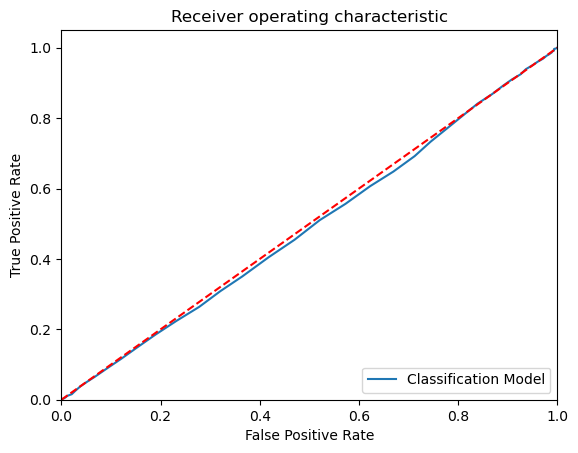

-----------------------------------------------------------------------------------------------------


In [59]:
# To build the 'safedriverprediction' model with random sampling

from sklearn.ensemble import RandomForestClassifier

# Create model object

ModelRF = RandomForestClassifier()
#ModelRF = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2,
#                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
#                                 max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
#                                 n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
#                                 ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelRF.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelRF.predict(x_test)
y_pred_prob = ModelRF.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF.predict_proba(x_test)[:,1])
plt.figure()
#--------------------------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [60]:
# Results

PredResults = pd.DataFrame({'target_A':y_test, 'target_P':y_pred})

# Merge two Dataframes on index of both the dataframes

TestDataResults = safedriver_bk.merge(PredResults, left_index=True, right_index=True)

# Display the 10 records randomly

TestDataResults.sample(5)

,ID,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,Age_bucket,EngineHP_bucket,Years_Experience_bucket,Miles_driven_annually_bucket,credit_history_bucket,State,target_A,target_P
20699,20700,1,F,264,610,7,1,Single,Utility,12691.0,1,35-40,161-350,3-8',>25k,Fair,AK,1,1
16266,16267,0,M,115,676,5,2,Single,Car,10244.0,2,18-27,90-160,3-8',>25k,Good,NM,0,1
10525,10526,0,M,109,678,12,0,Married,Utility,7885.0,3,28-34,90-160,9-14',<15k,Good,NY,0,1
12425,12426,1,M,436,619,3,0,Single,Utility,10853.0,5,18-27,>350,3-8',>25k,Fair,NY,1,1
27129,27130,0,M,148,798,16,1,Married,Van,5680.0,7,>40,90-160,15-30,<15k,Very Good,NY,0,1


Model Name:  LogisticRegression()
Confusion matrix : 
 [[6442    0]
 [2630    0]]
Outcome values : 
 6442 0 2630 0
Classification report : 
               precision    recall  f1-score   support

           1       0.71      1.00      0.83      6442
           0       0.00      0.00      0.00      2630

    accuracy                           0.71      9072
   macro avg       0.36      0.50      0.42      9072
weighted avg       0.50      0.71      0.59      9072

Accuracy : 71.0 %
Precision : 71.0 %
Recall : 100.0 %
F1 Score : 0.83
Specificity or True Negative Rate : 0.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


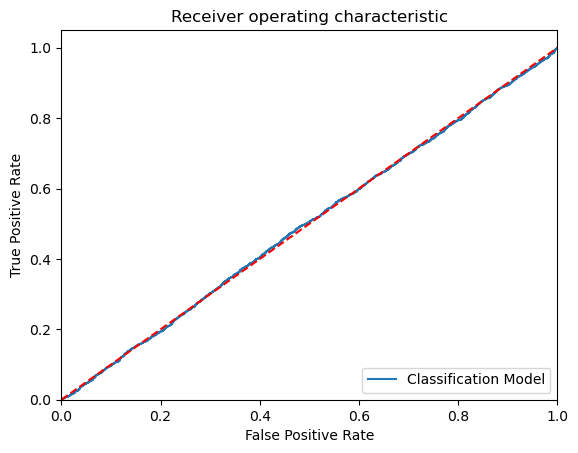

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[4402 2040]
 [1822  808]]
Outcome values : 
 4402 2040 1822 808
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.68      0.70      6442
           0       0.28      0.31      0.29      2630

    accuracy                           0.57      9072
   macro avg       0.50      0.50      0.50      9072
weighted avg       0.58      0.57      0.58      9072

Accuracy : 57.4 %
Precision : 70.7 %
Recall : 68.3 %
F1 Score : 0.695
Specificity or True Negative Rate : 30.7 %
Balanced Accuracy : 49.5 %
MCC : -0.009
roc_auc_score: 0.495


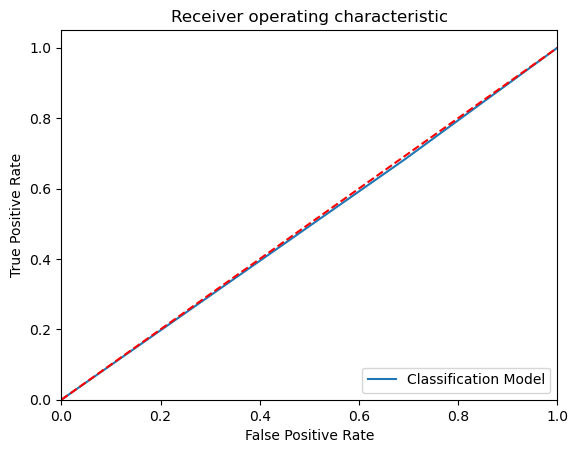

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[6344   98]
 [2599   31]]
Outcome values : 
 6344 98 2599 31
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.98      0.82      6442
           0       0.24      0.01      0.02      2630

    accuracy                           0.70      9072
   macro avg       0.47      0.50      0.42      9072
weighted avg       0.57      0.70      0.59      9072

Accuracy : 70.3 %
Precision : 70.9 %
Recall : 98.5 %
F1 Score : 0.825
Specificity or True Negative Rate : 1.2 %
Balanced Accuracy : 49.8 %
MCC : -0.013
roc_auc_score: 0.498


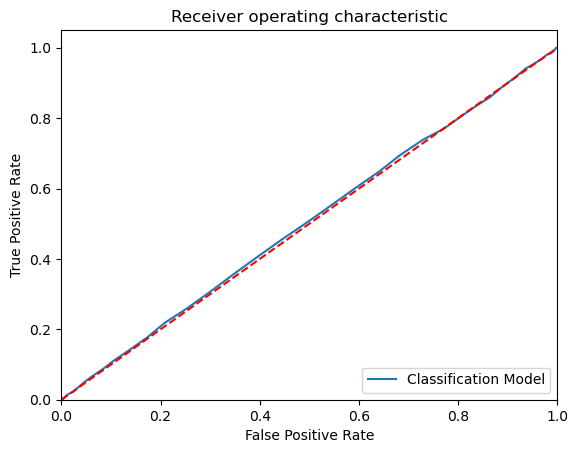

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[6206  236]
 [2543   87]]
Outcome values : 
 6206 236 2543 87
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.96      0.82      6442
           0       0.27      0.03      0.06      2630

    accuracy                           0.69      9072
   macro avg       0.49      0.50      0.44      9072
weighted avg       0.58      0.69      0.60      9072

Accuracy : 69.4 %
Precision : 70.9 %
Recall : 96.3 %
F1 Score : 0.817
Specificity or True Negative Rate : 3.3 %
Balanced Accuracy : 49.8 %
MCC : -0.009
roc_auc_score: 0.498


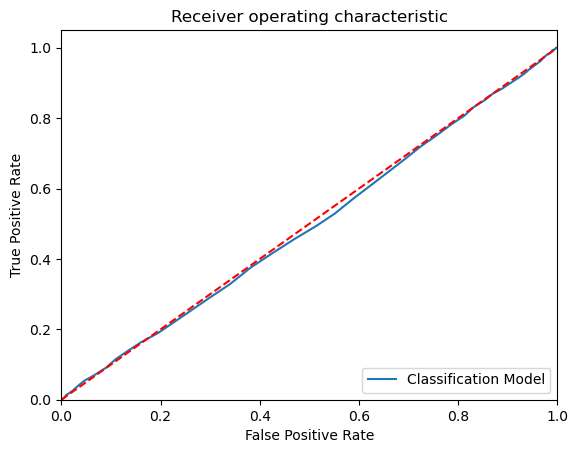

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[5512  930]
 [2220  410]]
Outcome values : 
 5512 930 2220 410
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.86      0.78      6442
           0       0.31      0.16      0.21      2630

    accuracy                           0.65      9072
   macro avg       0.51      0.51      0.49      9072
weighted avg       0.59      0.65      0.61      9072

Accuracy : 65.3 %
Precision : 71.3 %
Recall : 85.6 %
F1 Score : 0.778
Specificity or True Negative Rate : 15.6 %
Balanced Accuracy : 50.6 %
MCC : 0.015
roc_auc_score: 0.506


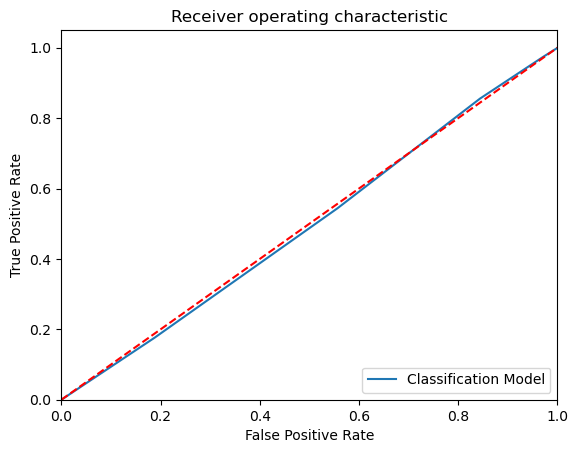

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[6442    0]
 [2630    0]]
Outcome values : 
 6442 0 2630 0
Classification report : 
               precision    recall  f1-score   support

           1       0.71      1.00      0.83      6442
           0       0.00      0.00      0.00      2630

    accuracy                           0.71      9072
   macro avg       0.36      0.50      0.42      9072
weighted avg       0.50      0.71      0.59      9072

Accuracy : 71.0 %
Precision : 71.0 %
Recall : 100.0 %
F1 Score : 0.83
Specificity or True Negative Rate : 0.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


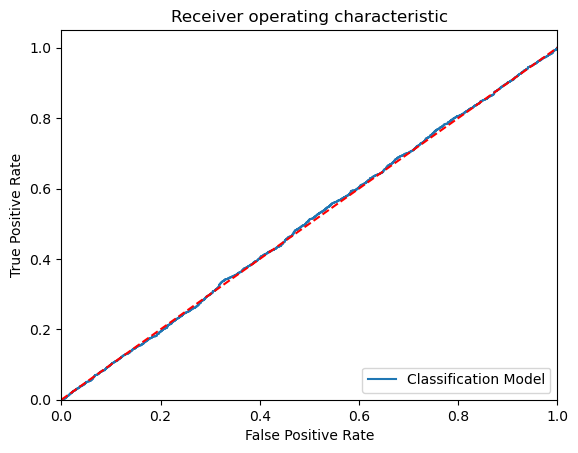

-----------------------------------------------------------------------------------------------------
Model Name:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)
Confusion matrix : 
 [[6405   37]
 [2609   21]]
Outcome values : 
 6405 37 2609 21
Classification report : 
               precisi

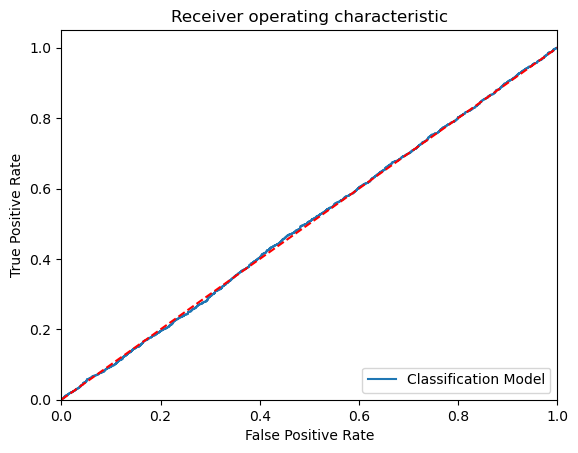

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[6412   30]
 [2614   16]]
Outcome values : 
 6412 30 2614 16
Classification report : 
               precision    recall  f1-score   support

           1       0.71      1.00      0.83      6442
           0       0.35      0.01      0.01      2630

    accuracy                           0.71      9072
   macro avg       0.53      0.50      0.42      9072
weighted avg       0.61      0.71      0.59      9072

Accuracy : 70.9 %
Precision : 71.0 %
Recall : 99.5 %
F1 Score : 0.829
Specificity or True Negative Rate : 0.6 %
Balanced Accuracy : 50.0 %
MCC : 0.009
roc_auc_score: 0.501


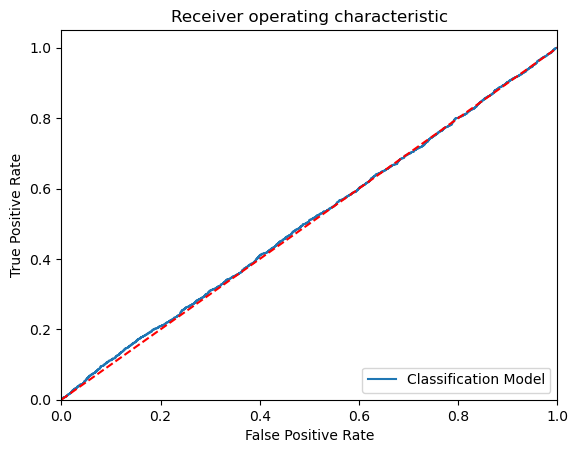

-----------------------------------------------------------------------------------------------------


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import lightgbm as lgb
import matplotlib.pyplot as plt  # Don't forget to import this for plotting ROC curve

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelGNB = GaussianNB()
ModelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')
ModelLGB = lgb.LGBMClassifier()

# Evaluation matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelXGB, ModelLGB]

# Rest of your code...

for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    

In [76]:
# Results with comparing the all the algorithms 

#EMResults.to_csv("D:\Nikhil's Stuff\internship\project\archive\IT_3.csv")

EMResults.head(8)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),6442,0,2630,0,0.710,0.710,1.000,0.830,0.000,NaN,0.500000,0.500
1,DecisionTreeClassifier(),4423,2019,1837,793,0.575,0.707,0.687,0.696,0.302,-0.012,0.494054,0.495
2,"(DecisionTreeClassifier(max_features='sqrt', r...",6348,94,2591,39,0.704,0.710,0.985,0.825,0.015,0.001,0.500119,0.500
3,"(ExtraTreeClassifier(random_state=1344022104),...",6206,236,2541,89,0.694,0.710,0.963,0.817,0.034,-0.007,0.498603,0.498
4,KNeighborsClassifier(),5512,930,2220,410,0.653,0.713,0.856,0.778,0.156,0.015,0.505764,0.506
5,GaussianNB(),6442,0,2630,0,0.710,0.710,1.000,0.830,0.000,NaN,0.500000,0.500
6,"XGBClassifier(base_score=None, booster=None, c...",6405,37,2609,21,0.708,0.711,0.994,0.829,0.008,0.013,0.501121,0.501
7,LGBMClassifier(),6412,30,2614,16,0.709,0.710,0.995,0.829,0.006,0.009,0.500713,0.500


Confusion matrix : 
 [[6442    0]
 [2630    0]]
Outcome values : 
 6442 0 2630 0
Classification report : 
               precision    recall  f1-score   support

           1       0.71      1.00      0.83      6442
           0       0.00      0.00      0.00      2630

    accuracy                           0.71      9072
   macro avg       0.36      0.50      0.42      9072
weighted avg       0.50      0.71      0.59      9072

Accuracy : 71.0 %
Precision : 71.0 %
Recall : 100.0 %
F1 Score : 0.83
Specificity or True Negative Rate : 0.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


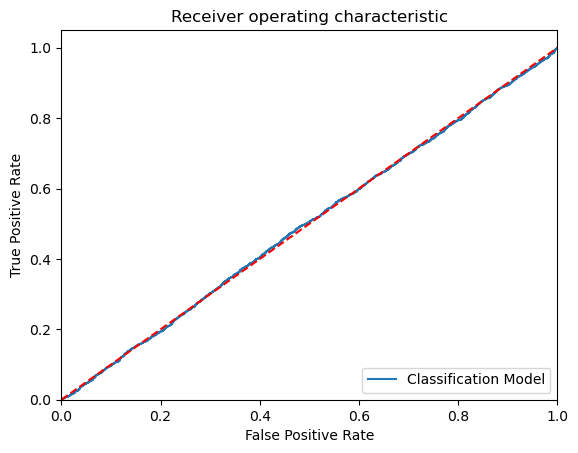

-----------------------------------------------------------------------------------------------------


In [77]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

# Create model object

ModelLR = LogisticRegression()

# Fit the model

ModelLR.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelLR.predict(x_test)

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelLR.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelLR,
           'True_Positive': tp,
           'False_Negative': fn, 
           'False_Positive': fp, 
           'True_Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
EMResults = EMResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [78]:
# Hyperparameter tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# Performance or convergence with different solvers

solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Regularization (penalty)

penalty = ['none', 'l1', 'l2', 'elasticnet']

# C parameter controls the penality strength

C_space = np.logspace(-5, 8, 15)

# Class weight 

class_weight = ['None', 'dict', 'balanced']

# Maximum number of iterations taken for the solvers to converge

max_iter = [100, 1000, 2500, 5000]

# Create the random grid

Random_Grid = {'solver': solver,
               'penalty': penalty,
               'C': C_space,
               'class_weight': class_weight,
               'max_iter' : max_iter
              }

print(Random_Grid)

{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['none', 'l1', 'l2', 'elasticnet'], 'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]), 'class_weight': ['None', 'dict', 'balanced'], 'max_iter': [100, 1000, 2500, 5000]}


In [79]:
# Prepare the cross-validation procedure

from sklearn.model_selection import RepeatedKFold

RKCV = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [80]:
ModelLR = LogisticRegression()

ModelLR_RandomCV=RandomizedSearchCV(estimator=ModelLR, param_distributions=Random_Grid, n_iter=100, cv=3, verbose=2,
                                    random_state=100, n_jobs=-1)
### fit the randomized model

ModelLR_RandomCV.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                                        'class_weight': ['None', 'dict',
                                                         'balanced'],
                                        'max_iter': [100, 1000, 2500, 5000],
                                        'penalty': ['none', 'l1', 'l2',
                                                    'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=100, verbose=2)

In [81]:
# best or the optimal values of the parameters for which the model performed the best

ModelLR_RandomCV.best_params_

{'solver': 'lbfgs',
 'penalty': 'none',
 'max_iter': 5000,
 'class_weight': 'balanced',
 'C': 1e-05}

Confusion matrix : 
 [[6442    0]
 [2630    0]]
Outcome values : 
 6442 0 2630 0
Classification report : 
               precision    recall  f1-score   support

           1       0.71      1.00      0.83      6442
           0       0.00      0.00      0.00      2630

    accuracy                           0.71      9072
   macro avg       0.36      0.50      0.42      9072
weighted avg       0.50      0.71      0.59      9072

Accuracy : 71.0 %
Precision : 71.0 %
Recall : 100.0 %
F1 Score : 0.83
Specificity or True Negative Rate : 0.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


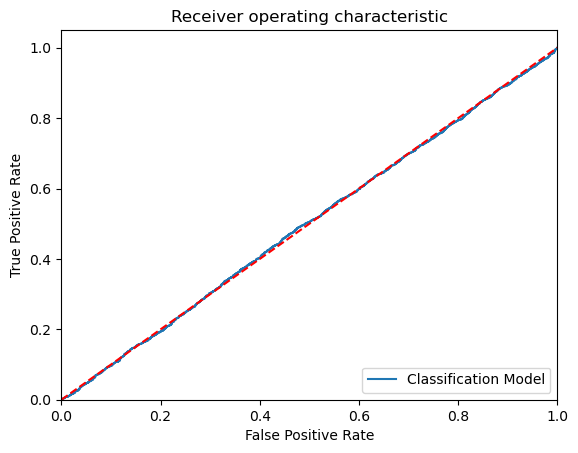

-----------------------------------------------------------------------------------------------------


In [82]:
# To build the 'Logistic Regression' model with random sampling (Hyper parameter with RandomizedSearchCV)

from sklearn.linear_model import LogisticRegression

# Create model object

ModelLR = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=3.727593720314938, fit_intercept=True,
                             intercept_scaling=1, class_weight=None, random_state=None, solver='saga', 
                             max_iter=2500, multi_class='auto', verbose=0, warm_start=False, 
                             n_jobs=None, l1_ratio=None)

# Fit the model

ModelLR.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelLR.predict(x_test)
y_pred_prob = ModelLR.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelLR.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelLR,
           'True_Positive': tp,
           'False_Negative': fn, 
           'False_Positive': fp, 
           'True_Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
EMResults = EMResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [83]:
# Hyperparameter tuning by GridSearchCV

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

GS_grid = {'solver':  ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
           'penalty': ['none', 'l1', 'l2', 'elasticnet'],
           'C': [100, 10, 1.0, 0.1, 0.01],
           'class_weight': ['None', 'dict', 'balanced'],
           'max_iter': [100, 1000,2500, 5000]
          }

# Create object for model

ModelLR = LogisticRegression(dual=True)

# Prepare the cross-validation procedure

from sklearn.model_selection import RepeatedKFold

#RKCV = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Instantiate the grid search model

Grid_search = GridSearchCV(estimator = ModelLR, param_grid = GS_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data

Grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


GridSearchCV(cv=3, estimator=LogisticRegression(dual=True), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': ['None', 'dict', 'balanced'],
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [84]:
# Best parameter from gridseachCV

Grid_search.best_params_

{'C': 100,
 'class_weight': 'balanced',
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

Confusion matrix : 
 [[3181 3261]
 [1277 1353]]
Outcome values : 
 3181 3261 1277 1353
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.49      0.58      6442
           0       0.29      0.51      0.37      2630

    accuracy                           0.50      9072
   macro avg       0.50      0.50      0.48      9072
weighted avg       0.59      0.50      0.52      9072

Accuracy : 50.0 %
Precision : 71.4 %
Recall : 49.4 %
F1 Score : 0.584
Specificity or True Negative Rate : 51.4 %
Balanced Accuracy : 50.4 %
MCC : 0.007
roc_auc_score: 0.504


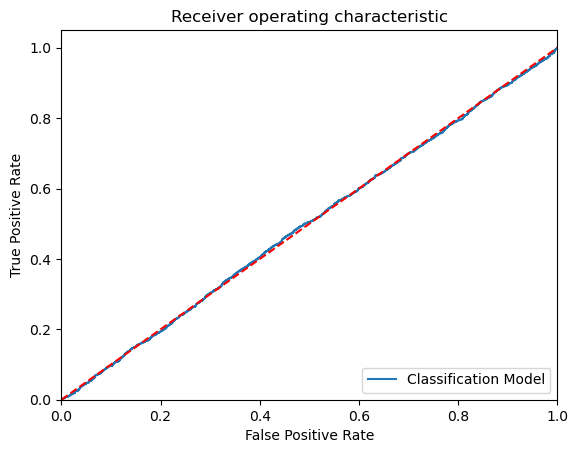

-----------------------------------------------------------------------------------------------------


In [85]:
# To build the 'Logistic Regression' model with random sampling (Hyper parameter tuning with GridSearchCV)

from sklearn.linear_model import LogisticRegression

# Create model object

ModelLR = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=100, fit_intercept=True,
                             intercept_scaling=1, class_weight='balanced', random_state=None, solver='liblinear', 
                             max_iter=100, multi_class='auto', verbose=0, warm_start=False, 
                             n_jobs=None, l1_ratio=None)

# Fit the model

ModelLR.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelLR.predict(x_test)
y_pred_prob = ModelLR.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelLR.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelLR,
           'True_Positive': tp,
           'False_Negative': fn, 
           'False_Positive': fp, 
           'True_Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
EMResults = EMResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [86]:
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),6442,0,2630,0,0.710,0.710,1.000,0.830,0.000,NaN,0.500000,0.500
1,DecisionTreeClassifier(),4423,2019,1837,793,0.575,0.707,0.687,0.696,0.302,-0.012,0.494054,0.495
2,"(DecisionTreeClassifier(max_features='sqrt', r...",6348,94,2591,39,0.704,0.710,0.985,0.825,0.015,0.001,0.500119,0.500
3,"(ExtraTreeClassifier(random_state=1344022104),...",6206,236,2541,89,0.694,0.710,0.963,0.817,0.034,-0.007,0.498603,0.498
4,KNeighborsClassifier(),5512,930,2220,410,0.653,0.713,0.856,0.778,0.156,0.015,0.505764,0.506
